In [227]:
#Here we will cover the following:
#1. Numpy Statistics
#2. Data Visualization
#3. Dictionaries
#4. Pandas and DataFrames
#5. merging DataFrames
#6. Concatenating DataFrames

In [228]:
import numpy as np

In [229]:
#Simulate data based on statistical distribution.
#Here is an example of simulating a sample with a size n=100 
#for S&P annual returns with a mean =0.12, and a standard deviation = 0.2.
#Thes parameters match the historical ones from 1926 - present


In [230]:
mean = 0.12
std=0.2
n=100
sp_ret = np.round(np.random.normal(mean,std,n),4)

In [231]:
sp_ret.shape

(100,)

In [232]:
sp_ret[0:10]

array([-0.1381,  0.1781, -0.0359,  0.2587,  0.1655, -0.1284,  0.0055,
        0.3846,  0.1286,  0.2467])

In [233]:
#Simulate a noise sample with a mean= 0 and std = 0.30

In [234]:
noise = np.round(np.random.normal(0,0.30,n),4)
noise[0:10]

array([-0.0005,  0.0695,  0.153 , -0.0187, -0.4049, -0.3606,  0.0776,
       -0.2554,  0.0451,  0.1483])

In [235]:
beta=1.25
stock_ret =beta*sp_ret[:10] + noise[:10]
stock_ret[0:10:-1]

array([], dtype=float64)

In [236]:
#Simulate Stock return with beta = 1.25

In [237]:
beta=1.25
stock_ret =beta*sp_ret + noise
stock_ret[0:10]

array([-0.173125,  0.292125,  0.108125,  0.304675, -0.198025, -0.5211  ,
        0.084475,  0.22535 ,  0.20585 ,  0.456675])

In [238]:
mean_hat= np.mean(sp_ret)
std_hat = np.std(sp_ret)
print ( mean_hat, std_hat)

0.126642 0.17220616608007974


In [239]:
mean_hat= np.round( np.mean(sp_ret),4)
std_hat = np.round( np.std(sp_ret), 4) 
print ( mean_hat, std_hat)

0.1266 0.1722


In [240]:
np.quantile(sp_ret,0.9) ## 90th percentile

np.float64(0.3034500000000003)

In [241]:
np.median(sp_ret)

np.float64(0.13065)

In [242]:
np.quantile(sp_ret,0.9) ## 90th percentile

np.float64(0.3034500000000003)

In [243]:
np.corrcoef(sp_ret,stock_ret)

array([[1.        , 0.55024699],
       [0.55024699, 1.        ]])

In [244]:
np.corrcoef(sp_ret,stock_ret)[0,1]

np.float64(0.5502469926741829)

In [245]:
#Calculate estimated beta

In [246]:
sp_std_hat = np.std(sp_ret)
stock_std_hat= np.std(stock_ret)
beta_hat = np.corrcoef(sp_ret,stock_ret)[0,1]*stock_std_hat/sp_std_hat
print( 'sp_std_hat=', sp_std_hat)
print( 'stock_std_hat=', stock_std_hat)
print ('beta_hat=',beta_hat)

sp_std_hat= 0.17220616608007974
stock_std_hat= 0.38386574852056027
beta_hat= 1.226558714603982


In [247]:
#We can create a 2D array of the two returns like the following:

In [248]:
returns= np.column_stack( ( sp_ret,stock_ret ) )
returns[0:10, :]

array([[-0.1381  , -0.173125],
       [ 0.1781  ,  0.292125],
       [-0.0359  ,  0.108125],
       [ 0.2587  ,  0.304675],
       [ 0.1655  , -0.198025],
       [-0.1284  , -0.5211  ],
       [ 0.0055  ,  0.084475],
       [ 0.3846  ,  0.22535 ],
       [ 0.1286  ,  0.20585 ],
       [ 0.2467  ,  0.456675]])

In [249]:
#2. Data Visualization

In [250]:
import matplotlib.pyplot as plt

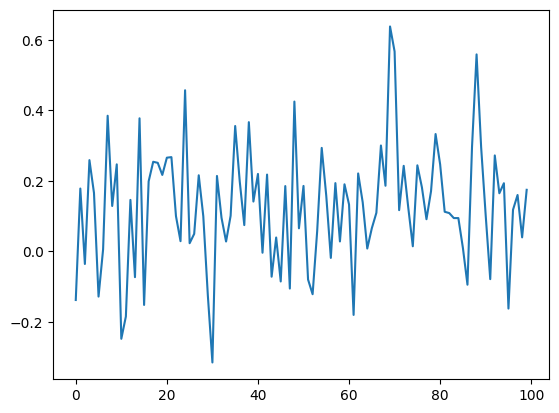

In [251]:
plt.plot(sp_ret)

In [252]:
#here is the plot against the index which is the sample number
#let us assign for each sample a year starting from 1926

In [253]:
year= np.array( list(range(1926,2026)) )
year

array([1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936,
       1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947,
       1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958,
       1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969,
       1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991,
       1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
       2025])

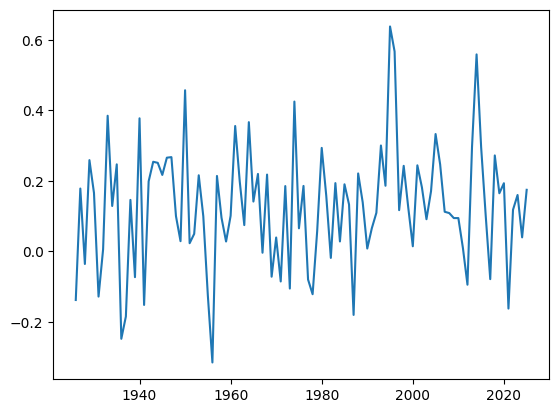

In [254]:
plt.plot(year, sp_ret)
plt.show()

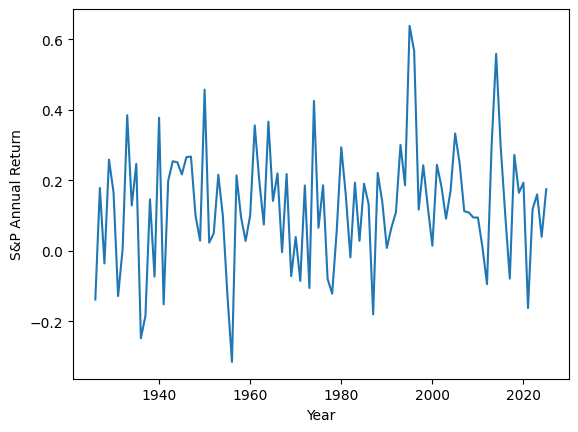

In [255]:
plt.plot(year, sp_ret)
plt.xlabel('Year')
plt.ylabel('S&P Annual Return')
plt.show()

In [256]:
# Scatter Plots

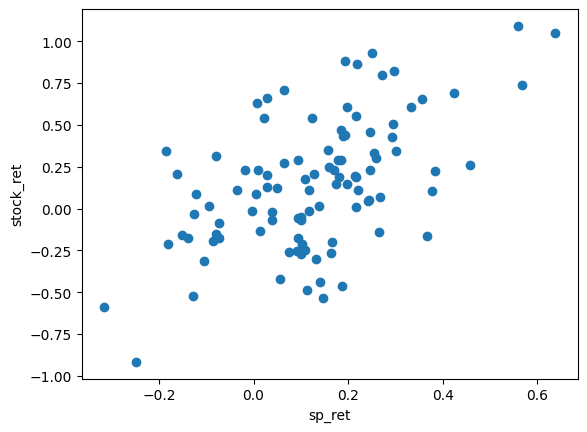

In [257]:
plt.scatter(sp_ret, stock_ret)
plt.xlabel('sp_ret')
plt.ylabel('stock_ret')
plt.show()

In [258]:
#ploting a histogram of the ditribution

In [259]:
help(plt.hist)


Help on function hist in module matplotlib.pyplot:

hist(x: 'ArrayLike | Sequence[ArrayLike]', bins: 'int | Sequence[float] | str | None' = None, range: 'tuple[float, float] | None' = None, density: 'bool' = False, weights: 'ArrayLike | None' = None, cumulative: 'bool | float' = False, bottom: 'ArrayLike | float | None' = None, histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar', align: "Literal['left', 'mid', 'right']" = 'mid', orientation: "Literal['vertical', 'horizontal']" = 'vertical', rwidth: 'float | None' = None, log: 'bool' = False, color: 'ColorType | Sequence[ColorType] | None' = None, label: 'str | Sequence[str] | None' = None, stacked: 'bool' = False, *, data=None, **kwargs) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
    Compute and plot a histogram.
    
    This method uses `numpy.histogram` to bin the data in *x* and count the
    number of values in each bin, then draws the distributio

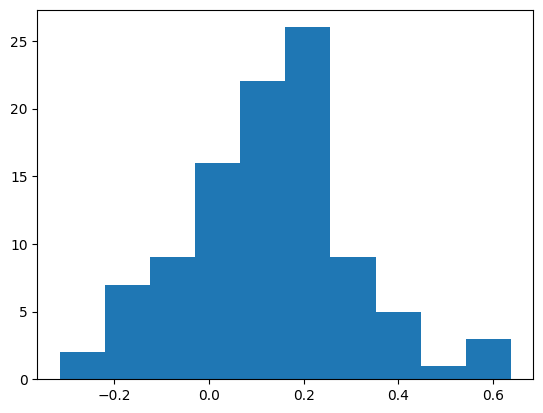

In [260]:
plt.hist(sp_ret)
plt.show()

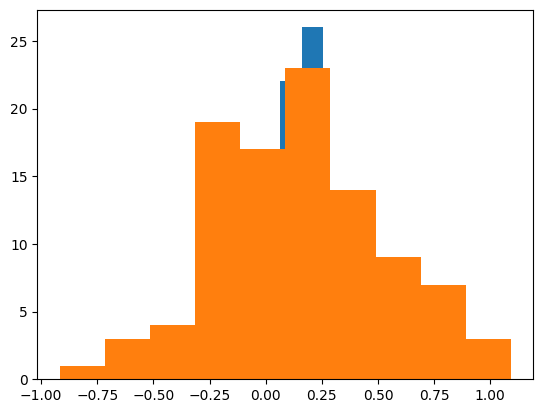

In [261]:
plt.hist(sp_ret)
plt.hist(stock_ret)
plt.show()


In [262]:
#3. Dictionaries
#Consider the following list of ETFs

In [263]:
sector_etfs = ["XLK","XLY", "XLV", "XLF", "XLI", "XLB", "XLRE","XLP","XLC", "XLU", "XLE"]
print(sector_etfs )


['XLK', 'XLY', 'XLV', 'XLF', 'XLI', 'XLB', 'XLRE', 'XLP', 'XLC', 'XLU', 'XLE']


In [264]:
sector_weights = [0.2422,0.0632,0.1309,0.1423,0.0886,0.0227,0.0257,0.12,0.1114,0.0245,0.0286]


In [265]:
len(sector_etfs )


11

In [266]:
len(sector_weights)

11

In [267]:
#Suppose that I want the weight of XLB sector
#we can find the index of XLB and use it to extract its weight from the sector_weights list

In [268]:
xlb_ind = sector_etfs.index('XLB')
xlb_ind

5

In [269]:
sector_weights[5]

0.0227

In [270]:
#This is cumbersome. Dictionaries simplify this problem to minimize typing¶

In [271]:
sect = sector_etfs[0:3]
wht = sector_weights[0:3]
print (sect,wht)

['XLK', 'XLY', 'XLV'] [0.2422, 0.0632, 0.1309]


In [272]:
## We can define a dictionary like the following

In [273]:
dict = {'XLK': 0.2422,'XLY':0.0632 , 'XLV':0.1309 }
dict

{'XLK': 0.2422, 'XLY': 0.0632, 'XLV': 0.1309}

In [274]:
dict['XLY']

0.0632

In [275]:
#we refer the term left to ':' the key and the term to the right as value
#Here is a good way to create a dictionary from any two lists

In [276]:
dict = {sector_etfs[i]: sector_weights[i] for i in range(len(sector_etfs))}
print(dict)

{'XLK': 0.2422, 'XLY': 0.0632, 'XLV': 0.1309, 'XLF': 0.1423, 'XLI': 0.0886, 'XLB': 0.0227, 'XLRE': 0.0257, 'XLP': 0.12, 'XLC': 0.1114, 'XLU': 0.0245, 'XLE': 0.0286}


In [277]:
#Keys in a dictionary should be unique

In [278]:
#4. Pandas and Data Frames
#A Data Frame is a tabular data structure like an excel spread sheet
#It is different from 2D Array in that arrays have to sam the same data type. I a Data Frame you can have different data types
#Pandas is a high level data manipulation tool
#In Pandas data is stored in a Data Frame object
#Typically rcolumns represent variables and row represent observations on these Variable.
#Each row has unique row label
#column has a name/ label
#How to crate a Data Frame?
#from a dictionary. An example using dict from earlier section

In [279]:
print(dict, type(dict) )

{'XLK': 0.2422, 'XLY': 0.0632, 'XLV': 0.1309, 'XLF': 0.1423, 'XLI': 0.0886, 'XLB': 0.0227, 'XLRE': 0.0257, 'XLP': 0.12, 'XLC': 0.1114, 'XLU': 0.0245, 'XLE': 0.0286} <class 'dict'>


In [280]:
import pandas as pd # First import pandas

In [281]:
sectors= {'XLK': ['Technology',0.2422, 0.2307] , 'XLF':['Financial',0.143, 0.1641],
            'XLI':['Industrial', 0.0866, 0.1434]}
sectors

{'XLK': ['Technology', 0.2422, 0.2307],
 'XLF': ['Financial', 0.143, 0.1641],
 'XLI': ['Industrial', 0.0866, 0.1434]}

In [282]:
type(sectors)

dict

In [283]:
sectors_df = pd.DataFrame(sectors)
sectors_df

,XLK,XLF,XLI
0,Technology,Financial,Industrial
1,0.2422,0.143,0.0866
2,0.2307,0.1641,0.1434


In [284]:
#Note that key items become column names
#Note the index is row number
#We can change row labels by specifying an index

In [285]:
sectors_df = pd.DataFrame(sectors, index=['sector', 'weight' , 'return'])
sectors_df

,XLK,XLF,XLI
sector,Technology,Financial,Industrial
weight,0.2422,0.143,0.0866
return,0.2307,0.1641,0.1434


In [286]:
#we can transpose this data frame with

In [287]:
sectors_df.T ## the T attribute provides the transpose of the data frame

,sector,weight,return
XLK,Technology,0.2422,0.2307
XLF,Financial,0.143,0.1641
XLI,Industrial,0.0866,0.1434


In [288]:
#Most data is to large to be entered by hand. Pandas allow importing data from the following formats:
#CSV
#JSON-- JavaScript Object Notation, often used when data is sent from a server to a web page
#Excel
#Databases -- store data in a structured format, organized into tables and fields. Individual entries within a database are called records. Databases are commonly used for storing data referenced by dynamic websites. Common database file extensions include .DB, .ACCDB, .NSF, and .FP7.
#I have a csv file in my working directory with a name "sector_weights_returns.csv"

In [289]:
import os
os.getcwd()

'/Users/aruvins/Desktop/Fordham/Fall 2025/Computational Finance'

In [356]:
sectors= pd.read_csv('dataFiles/sector_weights_returns.csv') 
sectors

,sector,etf_ticker,recent_weight,1Y_return,3Y_return,5Y_return,10Y_return
0,S&P Information Technology,XLK,0.2422,34.83,42.63,30.82,23.07
1,S&P Consumer Discretionary,XLY,0.0632,27.93,28.65,21.58,19.58
2,S&P Healthcare,XLV,0.1309,25.59,19.69,17.28,16.95
3,US Large Cap Blend,SPY,1.0000,28.74,25.99,18.36,16.45
4,S&P Financials,XLF,0.1423,34.82,20.46,13.15,16.15
5,S&P Industrials,XLI,0.0886,21.09,20.15,13.28,14.34
6,S&P Materials,XLB,0.0227,27.45,24.00,15.02,12.77
7,S&P Real Estate,XLRE,0.0257,45.26,22.31,14.61,12.56
8,S&P Consumer Staples,XLP,0.1200,17.20,18.05,11.31,11.99
9,S&P Communication Services,XLC,0.1114,15.96,24.47,8.69,11.16


In [291]:
#note that automatically the data frame is indexed by row number. To index the data frame by the forst column we do this

In [292]:
sectors= pd.read_csv('dataFiles/sector_weights_returns.csv', index_col=0) 
sectors

,etf_ticker,recent_weight,1Y_return,3Y_return,5Y_return,10Y_return
sector,,,,,,
S&P Information Technology,XLK,0.2422,34.83,42.63,30.82,23.07
S&P Consumer Discretionary,XLY,0.0632,27.93,28.65,21.58,19.58
S&P Healthcare,XLV,0.1309,25.59,19.69,17.28,16.95
US Large Cap Blend,SPY,1.0000,28.74,25.99,18.36,16.45
S&P Financials,XLF,0.1423,34.82,20.46,13.15,16.15
S&P Industrials,XLI,0.0886,21.09,20.15,13.28,14.34
S&P Materials,XLB,0.0227,27.45,24.00,15.02,12.77
S&P Real Estate,XLRE,0.0257,45.26,22.31,14.61,12.56
S&P Consumer Staples,XLP,0.1200,17.20,18.05,11.31,11.99


In [293]:
#What does tthis do?

In [294]:
sectors= pd.read_csv('dataFiles/sector_weights_returns.csv', index_col=1) 
sectors

,sector,recent_weight,1Y_return,3Y_return,5Y_return,10Y_return
etf_ticker,,,,,,
XLK,S&P Information Technology,0.2422,34.83,42.63,30.82,23.07
XLY,S&P Consumer Discretionary,0.0632,27.93,28.65,21.58,19.58
XLV,S&P Healthcare,0.1309,25.59,19.69,17.28,16.95
SPY,US Large Cap Blend,1.0000,28.74,25.99,18.36,16.45
XLF,S&P Financials,0.1423,34.82,20.46,13.15,16.15
XLI,S&P Industrials,0.0886,21.09,20.15,13.28,14.34
XLB,S&P Materials,0.0227,27.45,24.00,15.02,12.77
XLRE,S&P Real Estate,0.0257,45.26,22.31,14.61,12.56
XLP,S&P Consumer Staples,0.1200,17.20,18.05,11.31,11.99


In [295]:
# Select a column

In [296]:
sectors['1Y_return']

etf_ticker
XLK     34.83
XLY     27.93
XLV     25.59
SPY     28.74
XLF     34.82
XLI     21.09
XLB     27.45
XLRE    45.26
XLP     17.20
XLC     15.96
XLU     16.81
XLE     53.31
Name: 1Y_return, dtype: float64

In [297]:
type(sectors['1Y_return'])

pandas.core.series.Series

In [298]:
#The type of the column is series

In [299]:
sectors[['1Y_return']]

,1Y_return
etf_ticker,
XLK,34.83
XLY,27.93
XLV,25.59
SPY,28.74
XLF,34.82
XLI,21.09
XLB,27.45
XLRE,45.26
XLP,17.20


In [300]:
type(sectors[['1Y_return']])

pandas.core.frame.DataFrame

In [301]:
#Here is a sub-DaataFrame

In [302]:
returns= sectors[['1Y_return', '5Y_return', '10Y_return']]
returns

,1Y_return,5Y_return,10Y_return
etf_ticker,,,
XLK,34.83,30.82,23.07
XLY,27.93,21.58,19.58
XLV,25.59,17.28,16.95
SPY,28.74,18.36,16.45
XLF,34.82,13.15,16.15
XLI,21.09,13.28,14.34
XLB,27.45,15.02,12.77
XLRE,45.26,14.61,12.56
XLP,17.20,11.31,11.99


In [303]:
# Here is a way to certain rows from returns

In [304]:
returns[1:4]

,1Y_return,5Y_return,10Y_return
etf_ticker,,,
XLY,27.93,21.58,19.58
XLV,25.59,17.28,16.95
SPY,28.74,18.36,16.45


In [305]:
#To select specific row as a Pandas DataFrame series

In [306]:
sectors.loc['SPY']

sector           US Large Cap Blend 
recent_weight                    1.0
1Y_return                      28.74
3Y_return                      25.99
5Y_return                      18.36
10Y_return                     16.45
Name: SPY, dtype: object

In [307]:
#To get it in a data frame

In [308]:
spy= sectors.loc[['SPY']]
spy

,sector,recent_weight,1Y_return,3Y_return,5Y_return,10Y_return
etf_ticker,,,,,,
SPY,US Large Cap Blend,1.0,28.74,25.99,18.36,16.45


In [309]:
#Select multiple row for multiple ETFs

In [310]:
sectors.loc[['SPY', 'XLF', 'XLV']]

,sector,recent_weight,1Y_return,3Y_return,5Y_return,10Y_return
etf_ticker,,,,,,
SPY,US Large Cap Blend,1.0000,28.74,25.99,18.36,16.45
XLF,S&P Financials,0.1423,34.82,20.46,13.15,16.15
XLV,S&P Healthcare,0.1309,25.59,19.69,17.28,16.95


In [311]:
#select certain row and certain columns

In [312]:
sectors.loc[['SPY', 'XLF', 'XLV'], ['5Y_return', '10Y_return']]


,5Y_return,10Y_return
etf_ticker,,
SPY,18.36,16.45
XLF,13.15,16.15
XLV,17.28,16.95


In [313]:
#if you want to select all rows in the above

In [314]:
sectors.loc[: , ['5Y_return', '10Y_return']]

,5Y_return,10Y_return
etf_ticker,,
XLK,30.82,23.07
XLY,21.58,19.58
XLV,17.28,16.95
SPY,18.36,16.45
XLF,13.15,16.15
XLI,13.28,14.34
XLB,15.02,12.77
XLRE,14.61,12.56
XLP,11.31,11.99


In [315]:
# Select all columns with specific rows ****

In [316]:
sectors.loc[['SPY', 'XLF', 'XLV'], :]

,sector,recent_weight,1Y_return,3Y_return,5Y_return,10Y_return
etf_ticker,,,,,,
SPY,US Large Cap Blend,1.0000,28.74,25.99,18.36,16.45
XLF,S&P Financials,0.1423,34.82,20.46,13.15,16.15
XLV,S&P Healthcare,0.1309,25.59,19.69,17.28,16.95


In [317]:
#if you want to select data based on row number

In [318]:
sectors.iloc[[1,3,5],:]

,sector,recent_weight,1Y_return,3Y_return,5Y_return,10Y_return
etf_ticker,,,,,,
XLY,S&P Consumer Discretionary,0.0632,27.93,28.65,21.58,19.58
SPY,US Large Cap Blend,1.0000,28.74,25.99,18.36,16.45
XLI,S&P Industrials,0.0886,21.09,20.15,13.28,14.34


In [319]:
sectors.iloc[:, [2,3]]

,1Y_return,3Y_return
etf_ticker,,
XLK,34.83,42.63
XLY,27.93,28.65
XLV,25.59,19.69
SPY,28.74,25.99
XLF,34.82,20.46
XLI,21.09,20.15
XLB,27.45,24.00
XLRE,45.26,22.31
XLP,17.20,18.05


In [320]:
n1= 6
n2= 10
sectors.iloc[n1:n2, [2,3]]

,1Y_return,3Y_return
etf_ticker,,
XLB,27.45,24.00
XLRE,45.26,22.31
XLP,17.20,18.05
XLC,15.96,24.47


In [321]:
#Let us create a data frame that excludes SPY

In [322]:
ls= [0,1,2]+list(range(4,11))
sectors_only= sectors.iloc[ls,:]
spy= sectors.iloc[3,:]
sectors_only

,sector,recent_weight,1Y_return,3Y_return,5Y_return,10Y_return
etf_ticker,,,,,,
XLK,S&P Information Technology,0.2422,34.83,42.63,30.82,23.07
XLY,S&P Consumer Discretionary,0.0632,27.93,28.65,21.58,19.58
XLV,S&P Healthcare,0.1309,25.59,19.69,17.28,16.95
XLF,S&P Financials,0.1423,34.82,20.46,13.15,16.15
XLI,S&P Industrials,0.0886,21.09,20.15,13.28,14.34
XLB,S&P Materials,0.0227,27.45,24.00,15.02,12.77
XLRE,S&P Real Estate,0.0257,45.26,22.31,14.61,12.56
XLP,S&P Consumer Staples,0.1200,17.20,18.05,11.31,11.99
XLC,S&P Communication Services,0.1114,15.96,24.47,8.69,11.16


In [323]:
np.average( a= sectors_only['1Y_return'],weights=sectors_only['recent_weight'])

np.float64(27.189170355120947)

In [324]:
spy= pd.DataFrame(sectors.iloc[3,:])
spy.loc['1Y_return'][0]

/var/folders/h0/s41cy5xj0qx08m983bv4kc3c0000gn/T/ipykernel_4795/1487546250.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spy.loc['1Y_return'][0]


np.float64(28.74)

In [325]:
#5. Merging data frames
# You can use merge() any time you want to do database-like join operations. 
# Typically you have two DataFrames with common columns.
# Your analysis requires combining the two in order to do analysis that requires information from columns in the union of both.¶
# Let us start with an example. Here we are importing two data frames
# from the sam excel file from two different sheets

In [326]:
ipos_2019_1 = pd.read_excel('dataFiles/SME_IPOs_2019_2021.xlsx', sheet_name='2019_1')
ipos_2019_1

,Company_Name,Listing_date,Issue Price,listing_day_close_price,Listing_day_%change
0,Prince Pipes and Fittings Ltd,2019-12-30,178,166.60,-6.40
1,Ujjivan Small Finance Bank Ltd,2019-12-12,37,55.90,51.08
2,CSB Bank Limited,2019-12-04,195,300.10,53.90
3,IRCTC Limited,2019-10-14,320,728.60,127.69
4,Vishwaraj Sugar Industries Ltd,2019-10-15,60,60.35,0.58
5,Sterling and Wilson Solar Ltd,2019-08-20,780,725.35,-7.01
6,Spandana Sphoorty Financial Ltd,2019-08-19,856,848.40,-0.89
7,Affle (India,2019-08-08,745,875.10,17.46
8,IndiaMART InterMESH Limited,2019-07-04,973,1302.55,33.87
9,Neogen Chemicals Limited,2019-05-08,215,263.55,22.58


In [327]:
ipos_2019_2 = pd.read_excel('dataFiles/SME_IPOs_2019_2021.xlsx', sheet_name='2019_2')
ipos_2019_2

,Company_Name,Listing_date,current_price,gaain_%
0,Prince Pipes and Fittings Ltd,2019-12-30,699.10,292.75
1,Ujjivan Small Finance Bank Ltd,2019-12-12,19.90,-46.22
2,CSB Bank Limited,2019-12-04,253.30,29.90
3,IRCTC Limited,2019-10-14,843.15,1217.42
4,Vishwaraj Sugar Industries Ltd,2019-10-15,27.05,125.42
5,Sterling and Wilson Solar Ltd,2019-08-20,377.45,-51.61
6,Spandana Sphoorty Financial Ltd,2019-08-19,401.65,-53.08
7,Affle (India,2019-08-08,1333.95,795.27
8,IndiaMART InterMESH Limited,2019-07-04,6569.70,575.20
9,Neogen Chemicals Limited,2019-05-08,1837.50,754.65


In [328]:
# The two data frames have two common columns:
#'Company_Name' and 'Listing_date'. Here is how we merge these two data frames:

In [329]:
ipos_2019 = pd.merge(ipos_2019_1, ipos_2019_2, on = 'Company_Name')
ipos_2019

,Company_Name,Listing_date_x,Issue Price,listing_day_close_price,Listing_day_%change,Listing_date_y,current_price,gaain_%
0,Prince Pipes and Fittings Ltd,2019-12-30,178,166.60,-6.40,2019-12-30,699.10,292.75
1,Ujjivan Small Finance Bank Ltd,2019-12-12,37,55.90,51.08,2019-12-12,19.90,-46.22
2,CSB Bank Limited,2019-12-04,195,300.10,53.90,2019-12-04,253.30,29.90
3,IRCTC Limited,2019-10-14,320,728.60,127.69,2019-10-14,843.15,1217.42
4,Vishwaraj Sugar Industries Ltd,2019-10-15,60,60.35,0.58,2019-10-15,27.05,125.42
5,Sterling and Wilson Solar Ltd,2019-08-20,780,725.35,-7.01,2019-08-20,377.45,-51.61
6,Spandana Sphoorty Financial Ltd,2019-08-19,856,848.40,-0.89,2019-08-19,401.65,-53.08
7,Affle (India,2019-08-08,745,875.10,17.46,2019-08-08,1333.95,795.27
8,IndiaMART InterMESH Limited,2019-07-04,973,1302.55,33.87,2019-07-04,6569.70,575.20
9,Neogen Chemicals Limited,2019-05-08,215,263.55,22.58,2019-05-08,1837.50,754.65


In [330]:
ipos_2019.shape

(17, 8)

In [331]:
# Note that this merge statement retained the listing_date in both data
# frames with attaching x to the name of the first and y to the name of the second. 
# We can merge on both columns in the data frames¶

In [332]:
ipos_2019 = pd.merge(ipos_2019_1, ipos_2019_2, 
                     left_on = ['Company_Name','Listing_date'] ,
                     right_on= ['Company_Name','Listing_date'] )
ipos_2019.shape

(17, 7)

In [333]:
ipos_2019.head()

,Company_Name,Listing_date,Issue Price,listing_day_close_price,Listing_day_%change,current_price,gaain_%
0,Prince Pipes and Fittings Ltd,2019-12-30,178,166.60,-6.40,699.10,292.75
1,Ujjivan Small Finance Bank Ltd,2019-12-12,37,55.90,51.08,19.90,-46.22
2,CSB Bank Limited,2019-12-04,195,300.10,53.90,253.30,29.90
3,IRCTC Limited,2019-10-14,320,728.60,127.69,843.15,1217.42
4,Vishwaraj Sugar Industries Ltd,2019-10-15,60,60.35,0.58,27.05,125.42


In [334]:
#6. Concatenating data frames
# here we need to create a data frame that include IPOS in 2019,2020,2021
# Let us start by reading the relevand data frames

In [335]:
ipos_2020 = pd.read_excel('dataFiles/SME_IPOs_2019_2021.xlsx', sheet_name='2020')
ipos_2020.head()

,Company_Name,Listing_date,Issue Price,listing_day_close_price,Listing_day_%change,current_price,gaain_%
0,Mrs. Bectors Food Specialities Limited,2020-12-24,288,595.55,106.79,378.50,31.42
1,Burger King India Limited,2020-12-14,60,138.40,130.67,138.75,131.25
2,Gland Pharma Limited,2020-11-20,1500,1820.45,21.36,3955.85,163.72
3,Mazagon Dock Shipbuilders Limited,2020-10-12,145,173.00,19.31,279.50,92.76
4,Likhitha Infrastructure Ltd,2020-10-15,120,136.60,13.83,348.70,190.58


In [336]:
#Note that this data frame includes the same columns as ipos_2019

In [337]:
print(ipos_2019.shape, ipos_2020.shape)

(17, 7) (16, 7)


In [338]:
ipos_2021 = pd.read_excel('./dataFiles/SME_IPOs_2019_2021.xlsx', sheet_name='2021')
ipos_2021.head()

,Company_Name,Listing_date,Issue Price,listing_day_close_price,Listing_day_%change,current_price,gaain_%
0,CMS Info Systems Limited,2021-12-31,216,237.40,9.91,255.85,18.45
1,Supriya Lifescience Limited,2021-12-28,274,390.35,42.46,487.20,77.81
2,Medplus Health Services Limited,2021-12-23,796,1120.85,40.81,1017.40,27.81
3,HP Adhesives Limited,2021-12-27,274,334.95,22.24,447.60,63.36
4,Metro Brands Limited,2021-12-22,500,493.55,-1.29,455.20,-8.96


In [339]:
print(ipos_2019.shape, ipos_2020.shape , ipos_2021.shape )

(17, 7) (16, 7) (66, 7)


In [340]:
# NOte that the three data frames have the same number of columns but different rows

In [341]:
#Concatenating data frames
# Suppose we want to create a data frames about SME IPOs for the period 2019 to 2021.
# Here is how we do it

In [342]:
sme_ipos = pd.concat([ipos_2019, ipos_2020 , ipos_2021])

In [343]:
sme_ipos.shape

(99, 7)

In [344]:
sme_ipos.head()

,Company_Name,Listing_date,Issue Price,listing_day_close_price,Listing_day_%change,current_price,gaain_%
0,Prince Pipes and Fittings Ltd,2019-12-30,178,166.60,-6.40,699.10,292.75
1,Ujjivan Small Finance Bank Ltd,2019-12-12,37,55.90,51.08,19.90,-46.22
2,CSB Bank Limited,2019-12-04,195,300.10,53.90,253.30,29.90
3,IRCTC Limited,2019-10-14,320,728.60,127.69,843.15,1217.42
4,Vishwaraj Sugar Industries Ltd,2019-10-15,60,60.35,0.58,27.05,125.42


In [345]:
sme_ipos.tail()

,Company_Name,Listing_date,Issue Price,listing_day_close_price,Listing_day_%change,current_price,gaain_%
61,Home First Finance Company India Ltd.,2021-02-03,518,527.40,1.81,789.35,52.38
62,Indigo Paints Limited,2021-02-02,1490,3118.65,109.31,2046.60,37.36
63,Antony Waste Handling Cell Limited,2021-01-01,315,407.25,29.29,318.70,1.17
64,Indian Railway Finance Corporation Limited,2021-01-29,26,24.85,-4.42,22.85,-12.12
65,RailTel Corporation of India Limited,2021-02-26,94,121.40,29.15,119.55,27.18


In [346]:
sme_ipos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99 entries, 0 to 65
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Company_Name             99 non-null     object        
 1   Listing_date             99 non-null     datetime64[ns]
 2   Issue Price              99 non-null     int64         
 3   listing_day_close_price  99 non-null     float64       
 4   Listing_day_%change      99 non-null     float64       
 5   current_price            98 non-null     float64       
 6   gaain_%                  99 non-null     float64       
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 6.2+ KB


In [347]:
sme_ipos = sme_ipos.sort_values( by =['Listing_date'])
sme_ipos

,Company_Name,Listing_date,Issue Price,listing_day_close_price,Listing_day_%change,current_price,gaain_%
15,Xelpmoc Design and Tech Limited,2019-02-04,66,59.85,-9.32,399.05,504.62
16,Chalet Hotels Limited,2019-02-07,280,290.40,3.71,224.25,-19.91
14,MSTC Limited,2019-03-29,120,114.20,-4.83,348.30,190.25
13,Embassy Office Parks,2019-04-01,300,314.10,4.70,352.68,17.56
10,Rail Vikas Nigam Limited,2019-04-11,19,19.05,0.26,35.20,85.26
...,...,...,...,...,...,...,...
2,Medplus Health Services Limited,2021-12-23,796,1120.85,40.81,1017.40,27.81
6,Data Patterns (India,2021-12-24,585,754.85,29.03,761.25,30.13
3,HP Adhesives Limited,2021-12-27,274,334.95,22.24,447.60,63.36
1,Supriya Lifescience Limited,2021-12-28,274,390.35,42.46,487.20,77.81


In [348]:
sme_ipos.to_csv('sme_ipos_2019_2021.csv')

In [349]:
np.mean(sme_ipos['Listing_day_%change'])

np.float64(30.478787878787877)

In [350]:
np.min(sme_ipos['Listing_day_%change'])

np.float64(-27.25)

In [351]:
np.max(sme_ipos['Listing_day_%change'])


np.float64(270.4)

In [352]:
np.mean(sme_ipos['gaain_%'])

np.float64(114.76525252525252)

In [353]:
np.corrcoef(sme_ipos['Listing_day_%change'], sme_ipos['gaain_%'])

array([[1.       , 0.3245593],
       [0.3245593, 1.       ]])

In [354]:
odd = [1,3,5,7,9]
even=[2,4,6,8,10]
N = even+ odd
print(N)

[2, 4, 6, 8, 10, 1, 3, 5, 7, 9]


In [355]:
N[5]
N.index(5)

7